In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Objective**

For this lab, we're going to see if we can apply PCA on the MNIST dataset to reduce the feature space dimensionality, and still get good performance.

---

We begin by loading the MNIST-dataset, just as we did in the MNIST-lab.

In [3]:
import mnist

train_images, train_labels = mnist.train_images(), mnist.train_labels()

test_images, test_labels = mnist.test_images(), mnist.test_labels()

Let's plot an randome image

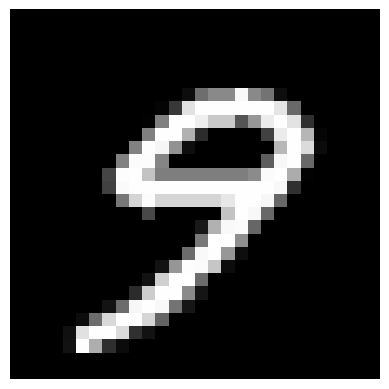

In [4]:
num_images = len(train_images)

random_index = np.random.randint(0, num_images)

plt.imshow(train_images[random_index], cmap='gray')
plt.axis('off')
plt.show()

Note that ALOT of the pixels are just completely black (grayscale value of 0), and don't actually add any relevant information at all.

*Hyphotesis*: PCA should, while identifying the important pieces of information and reducing dimensionality, get rid of precisely the reduntant information provided by these pixels.

---

Let's transform our data into dataframes, and scale them (important for PCA)

In [5]:
train_images_flattened = [list(image.flatten()) for image in train_images]

train_images_flattened_array = np.array([image.flatten() for image in train_images])

X_train = pd.DataFrame(train_images_flattened_array)

X_train = X_train / 255                                                       # divide by the maximum grayscale value

X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y_train = pd.DataFrame(train_labels)

y_train = np.array(y_train)

y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [7]:
test_images_flattened = [list(image.flatten()) for image in test_images]

test_images_flattened_array = np.array([image.flatten() for image in test_images])

X_test = pd.DataFrame(test_images_flattened_array)

X_test = X_test / 255

X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y_test = pd.DataFrame(test_labels)

y_test = np.array(y_test)

y_test

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)

---

Let's now define our PCA. 

**Important** To avoid data leagake, we must fit our PCA to only the train data, we then transform both the train and test data with what's been fitted on the train data.

In [9]:
from sklearn.decomposition import PCA

Make a guess as to how many dimensions we should reduce our feature space to.

*hint*: take a look at the plots above. How many pixels do you think are reduntant (useless)?

In [10]:
number_of_principal_components = 700          # your guess here

In [11]:
pca = PCA(n_components=number_of_principal_components)

# fit our PCA to the train_val set
pca_transformer = pca.fit(X_train)

In [12]:
# transform both train_val and test sets using the fitted transformer
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


# convert the reduced dimensions to dataframes
X_train_reduced = pd.DataFrame(X_train_pca)
X_test_reduced = pd.DataFrame(X_test_pca)


In [13]:
X_train_reduced

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,0.486010,-1.226174,-0.096134,-2.179443,-0.107046,-0.911672,0.917630,0.626665,-1.425549,0.778149,...,1.109190e-05,-2.064508e-04,0.000018,-0.000101,-0.000040,-0.000005,0.000049,0.000243,-4.732125e-07,0.000001
1,3.967523,-1.156302,2.338587,-1.806926,-3.244217,-0.713531,-0.176551,-0.411645,0.158663,0.592035,...,3.396331e-05,-3.654420e-05,-0.000015,0.000056,0.000059,0.000023,-0.000080,-0.000059,3.235906e-05,-0.000029
2,-0.203332,1.537934,-0.739254,2.043182,-1.202670,-0.007197,-3.368813,1.445458,-0.449200,-0.700032,...,2.694895e-06,-2.117861e-05,0.000016,0.000049,-0.000067,-0.000050,0.000044,-0.000125,4.702347e-05,0.000140
3,-3.133832,-2.381166,1.073142,0.415209,-0.007268,2.743744,-1.857699,-0.264007,1.187181,0.043574,...,-3.482144e-05,1.187708e-07,-0.000056,-0.000015,-0.000043,0.000033,0.000005,-0.000026,1.805023e-05,-0.000042
4,-1.501000,2.864874,0.064132,-0.947833,0.384946,0.169528,-0.359477,-1.590411,0.884321,0.408283,...,1.032040e-08,1.285786e-05,0.000010,-0.000042,-0.000193,0.000004,-0.000024,-0.000102,4.978662e-05,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.390674,-1.150885,0.533099,-1.361271,1.193239,0.929388,-1.955119,-0.931823,-1.940776,1.256215,...,2.354073e-04,8.629032e-05,-0.000083,-0.000022,0.000038,-0.000045,0.000051,-0.000105,2.396724e-05,0.000024
59996,0.599050,-2.697646,-0.348755,-2.549074,0.778069,0.724596,-1.910352,1.981700,-2.623009,0.106366,...,-5.269606e-05,8.069801e-07,-0.000147,-0.000009,0.000005,-0.000027,-0.000013,-0.000010,5.969467e-05,-0.000154
59997,-0.698249,0.627758,-1.010247,-2.802551,-0.824765,-1.813579,-1.821706,-0.724794,-0.343233,1.051431,...,3.873680e-04,3.674153e-05,-0.000077,-0.000018,0.000023,0.000007,-0.000014,-0.000054,-9.282675e-05,-0.000013
59998,0.512181,-0.021929,2.015132,1.343936,-2.043788,-2.119820,-0.421084,0.551878,-0.064689,-0.368007,...,1.108720e-04,-2.129480e-05,0.000007,0.000203,0.000001,-0.000047,-0.000143,0.000071,3.872009e-05,-0.000087


---

Train a (for example) KNeighborsClassifier, using the newly optained principle components as features

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train_reduced, y_train)

c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

---

Evaluate the trained model on the test set

In [16]:
knn_pred = knn.predict(X_test_reduced)

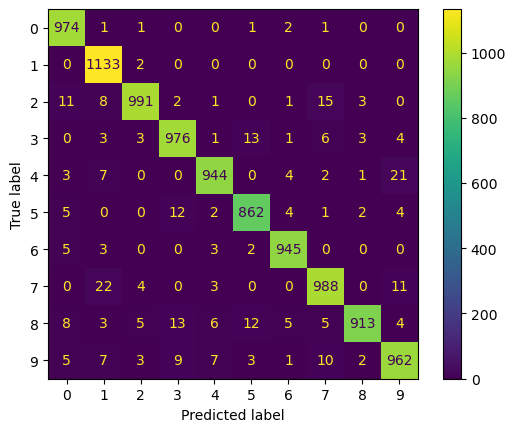

In [17]:
cm = confusion_matrix(y_true=y_test, y_pred=knn_pred.reshape(-1,1))

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()
plt.show() 

In [18]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy, end='\n\n')

report = classification_report(y_test, knn_pred)
print("Classification Report:\n", report)

Accuracy: 0.9688

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



---

## Challenges

**Task 1**

Now you go ahead and try different values for the number of dimensions to reduce your feature space to. 

How low can you reduce the feature space dimensionality, and still get good performance?

Plot accuracy as a function of the number of principle components. Does the result make sense?

In [19]:
accuracies = []

number_of_principal_components = [1,2,3,5,10,15,20,30,50,70,100,150,250,400,550,700]

for number in number_of_principal_components:

    pca = PCA(n_components=number)

    # fit our PCA to the train_val set
    pca_transformer = pca.fit(X_train)

    # transform both train_val and test sets using the fitted transformer
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)


    # convert the reduced dimensions to dataframes
    X_train_reduced = pd.DataFrame(X_train_pca)
    X_test_reduced = pd.DataFrame(X_test_pca)

    knn = KNeighborsClassifier()
    knn.fit(X_train_reduced, y_train)

    knn_pred = knn.predict(X_test_reduced)

    accuracies.append(accuracy_score(y_test, knn_pred))

c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vect

Text(0, 0.5, 'Total accuracy')

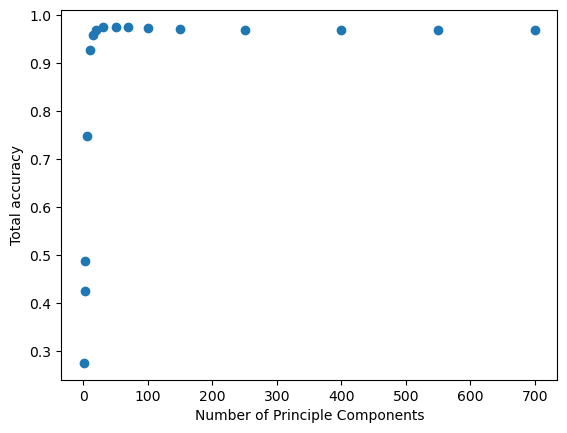

In [24]:
plt.scatter(number_of_principal_components[:], accuracies[:])
plt.xlabel('Number of Principle Components')
plt.ylabel('Total accuracy')